## **Topic Modeling**

## **Open the file**

In [1]:
import pandas as pd
file =file = "C:\\Users\\keert\\Downloads\\Reviews.csv"
df = pd.read_csv(file)
df.head(20) 

C:\Users\keert\AppData\Local\Temp\ipykernel_12532\4175921217.py:3: DtypeWarning: Columns (2,3,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


Id  Unnamed: 1          UserId                      ProfileName  \
0    1.0         NaN  A3SGXH7AUHU8GW                       delmartian   
1    2.0         NaN  A1D87F6ZCVE5NK                           dll pa   
2    3.0         NaN   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3    4.0         NaN  A395BORC6FGVXV                             Karl   
4    5.0         NaN  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
5    6.0         NaN   ADT0SRK1MGOEU                   Twoapennything   
6    7.0         NaN  A1SP2KVKFXXRU1                David C. Sullivan   
7    8.0         NaN  A3JRGQVEQN31IQ               Pamela G. Williams   
8    9.0         NaN  A1MZYO9TZK0BBI                         R. James   
9   10.0         NaN  A21BT40VZCCYT4                    Carol A. Reed   
10  11.0         NaN  A3HDKO7OW0QNK4                     Canadian Fan   
11  12.0         NaN  A2725IB4YY9JEB           A Poeng "SparkyGoHome"   
12  13.0         NaN   A327PCT23YH90                               LT   
13  14.0         NaN  A18ECVX2RJ7HUE                  willie "roadie"   
14   NaN         NaN             NaN                              NaN   
15  16.0         NaN  A1CZX3CP8IKQIJ                     Brian A. Lee   
16  17.0         NaN  A3KLWF6WQ5BNYO                   Erica Neathery   
17  18.0         NaN   AFKW14U97Z6QO                            Becca   
18  19.0         NaN  A2A9X58G2GTBLP                          Wolfee1   
19  20.0         NaN  A3IV7CL2C13K2U                             Greg   

    Unnamed: 4  HelpfulnessDenominator  Score          Time  \
0          NaN                     1.0    5.0  1.303862e+09   
1          NaN                     0.0    1.0  1.346976e+09   
2          NaN                     1.0    4.0  1.219018e+09   
3          NaN                     3.0    2.0  1.307923e+09   
4          NaN                     0.0    5.0  1.350778e+09   
5          NaN                     0.0    4.0  1.342051e+09   
6          NaN                     0.0    5.0  1.340150e+09   
7          NaN                     0.0    5.0  1.336003e+09   
8          NaN                     1.0    5.0  1.322006e+09   
9          NaN                     0.0    5.0  1.351210e+09   
10         NaN                     1.0    5.0  1.107821e+09   
11         NaN                     4.0    5.0  1.282867e+09   
12         NaN                     1.0    1.0  1.339546e+09   
13         NaN                     2.0    4.0  1.288915e+09   
14         NaN                     NaN    NaN           NaN   
15         NaN                     5.0    5.0  1.262045e+09   
16         NaN                     0.0    2.0  1.348099e+09   
17         NaN                     0.0    5.0  1.345075e+09   
18         NaN                     0.0    5.0  1.324598e+09   
19         NaN                     0.0    5.0  1.318032e+09   

                                            paragraph  \
0                               Good Quality Dog Food   
1                                   Not as Advertised   
2                               "Delight" says it all   
3                                      Cough Medicine   
4                                         Great taffy   
5                                          Nice Taffy   
6       Great!  Just as good as the expensive brands!   
7                              Wonderful, tasty taffy   
8                                          Yay Barley   
9                                    Healthy Dog Food   
10                    The Best Hot Sauce in the World   
11  My cats LOVE this "diet" food better than thei...   
12               My Cats Are Not Fans of the New Food   
13                                  fresh and greasy!   
14                                                NaN   
15           Lots of twizzlers, just what you expect.   
16                                         poor taste   
17                                           Love it!   
18                                 GREAT SWEET CANDY!   
19      

## **Look at a couple of texts**

In [29]:
print(repr(df.iloc[-1]["Text"][0:400]))  # Last row
print(repr(df.iloc[-2]["Text"][0:400]))  # Second to last row

'I am very satisfied ,product is as advertised, I use it on cereal, with raw vinegar, and as a general sweetner.'
'These are the BEST treats for training and rewarding your dog for being good while grooming.  Lower in calories and loved by all the doggies.  Sweet potatoes seem to be their favorite Wet Noses treat!'


## **We will split speech into sentences**

In [33]:
 df["paragraphs"] = df["Text"].apply(lambda text: re.split(r'\.[\s\n]+', str(text))); print(f"Paragraphs in last row: {len(df.iloc[-1]['paragraphs'])}, First paragraph: {repr(df.iloc[-1]['paragraphs'][0][:100]) if df.iloc[-1]['paragraphs'] else 'Empty'}")

Paragraphs in last row: 1, First paragraph: 'I am very satisfied ,product is as advertised, I use it on cereal, with raw vinegar, and as a genera'


# **Start by getting TFIDF**

In [25]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


# **Vectorizing Text Data with TF-IDF and Custom Stop Words**

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert stop words set to a list
stopwords_list = list(stopwords)

# Initialize TfidfVectorizer with the list of stop words
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['text'])
tfidf_text_vectors.shape

C:\Users\keert\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(448, 157)

# **Make a data frame of sentences**

In [35]:
# flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "text": paragraph, "year": year }
for paragraphs, year in zip(df["paragraphs"], df["year"])
for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

text    year
0  I have bought several of the Vitality canned d...  2020.0
1  The product looks more like a stew than a proc...  2020.0
2  My Labrador is finicky and she appreciates thi...  2020.0
3  Product arrived labeled as Jumbo Salted Peanut...  2022.0
4  Not sure if this was an error or if the vendor...  2022.0
5  This is a confection that has been around a fe...  2003.0
6  It is a light, pillowy citrus gelatin with nut...  2003.0
7  And it is cut into tiny squares and then liber...  2003.0
8                And it is a tiny mouthful of heaven  2003.0
9                  Not too chewy, and very flavorful  2003.0

# **Get the TFIDF of the sentences DF**

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Use 'english' instead of the set of stop words
tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])
tfidf_para_vectors.shape


(2599055, 42552)

# **Vectorizing Paragraph Text Data with TF-IDF and English Stop Words**

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Use 'english' instead of the set of stop words
tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])
tfidf_para_vectors.shape

(279076, 25156)

# **Applying NMF Topic Modeling to Review Text Data**

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load your DataFrame
paragraph_df = pd.read_csv("C:\\Users\\keert\\Downloads\\Reviews.csv")

# Drop rows with NaN values in "Text" column
paragraph_df.dropna(subset=['Text'], inplace=True)

# Define the list of stopwords
stopwords_list = stopwords.words('english')

# Initialize TfidfVectorizer
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(paragraph_df["Text"])

# Initialize NMF model
nmf_text_model = NMF(n_components=10, random_state=42)

# Fit the NMF model to the TF-IDF vectors
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\keert\AppData\Local\Temp\ipykernel_12532\3169600877.py:11: DtypeWarning: Columns (2,3,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  paragraph_df = pd.read_csv("C:\\Users\\keert\\Downloads\\Reviews.csv")


# **Displaying Top Topics Extracted by NMF:**

In [44]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]],
                                   abs(words[largest[i]] * 100.0 / total)))

# Call the function outside its definition with the appropriate arguments
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())



Topic 00
 video (27.54)
 youtube (27.02)
 check (19.80)
 playlist (3.89)
 new (2.47)

Topic 01
 song (52.99)
 best (9.82)
 good (3.58)
 awesome (3.20)
 amazing (3.10)

Topic 02
 like (34.08)
 type (3.73)
 comment (3.59)
 br (3.41)
 quot (3.29)

Topic 03
 com (13.94)
 moneygq (7.89)
 check (4.94)
 zonepa (4.81)
 000 (4.75)

Topic 04
 love (63.22)
 lie (10.02)
 way (7.95)
 rihanna (4.95)
 quot (1.95)

Topic 05
 eminem (43.87)
 rihanna (7.45)
 best (5.87)
 rap (4.94)
 lt (2.71)

Topic 06
 channel (29.99)
 check (22.38)
 hey (3.34)
 beats (3.28)
 thanks (3.26)

Topic 07
 39 (16.54)
 know (3.17)
 quot (3.17)
 don (2.72)
 thank (1.84)

Topic 08
 fox (37.44)
 megan (34.60)
 charlie (4.41)
 girl (4.30)
 lost (3.81)

Topic 09
 subscribe (49.45)
 videos (6.15)
 rihanna (5.59)
 watch (5.14)
 music (4.64)


**Run same model**

In [45]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())



Topic 00
 good (27.16)
 price (2.46)
 really (2.44)
 pretty (1.56)
 stuff (1.36)

Topic 01
 br (9.30)
 food (0.44)
 amazon (0.35)
 just (0.29)
 use (0.27)

Topic 02
 love (32.66)
 dogs (2.73)
 stuff (1.52)
 kids (1.32)
 food (1.19)

Topic 03
 great (28.46)
 price (3.77)
 taste (2.09)
 flavor (1.67)
 tastes (1.50)

Topic 04
 like (5.66)
 taste (3.20)
 just (1.92)
 really (1.43)
 flavor (1.14)

Topic 05
 product (17.94)
 amazon (1.71)
 excellent (1.14)
 happy (0.89)
 com (0.73)

Topic 06
 coffee (15.11)
 cup (3.16)
 strong (1.73)
 best (1.28)
 flavor (1.27)

Topic 07
 tea (14.12)
 green (2.05)
 best (1.29)
 flavor (1.17)
 drink (1.14)

Topic 08
 buy (15.13)
 amazon (2.74)
 price (1.88)
 definitely (1.74)
 store (1.44)

Topic 09
 recommend (29.53)
 highly (20.41)
 recommended (3.72)
 definitely (2.78)
 food (1.97)


# **Calculating Topic Distribution Percentages**

In [46]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([10.60491205,  9.42431832,  7.90802066,  9.39473857,  8.9701299 ,
       10.08522725, 12.94750017, 15.44743138,  5.59006548,  9.62765622])

# **Topic sizes:**

In [47]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([ 6.3577735 , 16.57075887,  8.30917371, 10.35714969, 19.69894607,
        7.28020526,  8.38501636,  9.20895746,  9.32074864,  4.51127043])

# **Applying LDA Topic Modeling to Review Text Data**

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords  
import numpy as np

# Load your DataFrame 'paragraph_df' and handle missing values
paragraph_df = pd.read_csv("C:\\Users\\keert\\Downloads\\Reviews.csv")

# Drop rows with missing text in the 'Text' column
paragraph_df = paragraph_df.dropna(subset=['Text'])

# Convert the set of stopwords to a list
stopwords_list = list(stopwords.words('english'))

# Initialize CountVectorizer with your parameters
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform your text data
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["Text"])

# Check the shape of the document-term matrix
print("Shape of document-term matrix:", count_para_vectors.shape)

# Define and fit the LDA model
lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_


C:\Users\keert\AppData\Local\Temp\ipykernel_12532\689762331.py:8: DtypeWarning: Columns (2,3,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  paragraph_df = pd.read_csv("C:\\Users\\keert\\Downloads\\Reviews.csv")


Shape of document-term matrix: (72, 71)


# **Extracting Topics Using  (LDA) and Visualizing Results**

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import numpy as np

# Load your DataFrame 'paragraph_df'
paragraph_df = pd.read_csv("C:\\Users\\keert\\Downloads\\Reviews.csv")

# Drop rows with missing text in the 'Text' column
paragraph_df = paragraph_df.dropna(subset=['Text'])

# Convert the NLTK stopwords set to a list
stopwords_list = stopwords.words('english')

# Initialize CountVectorizer with the list of stop words
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["Text"])
print("Shape of document-term matrix:", count_para_vectors.shape)

# Define and fit the LDA model
lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_


C:\Users\keert\AppData\Local\Temp\ipykernel_12532\86091916.py:8: DtypeWarning: Columns (2,3,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  paragraph_df = pd.read_csv("C:\\Users\\keert\\Downloads\\Reviews.csv")


Shape of document-term matrix: (72, 71)


# **Run the LDA**

In [7]:
def display_topics(model, feature_names, no_top_words=5):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Get feature names from the vocabulary generated by CountVectorizer
feature_names = count_para_vectorizer.get_feature_names_out()

# Display topics using the vocabulary generated by CountVectorizer
display_topics(lda_para_model, feature_names)


Topic 1:
love candy cut back twizzlers

Topic 2:
br taste well every thing

Topic 3:
br hot love price us

Topic 4:
good like candy little flavor

Topic 5:
really two would bag ordered

Topic 6:
product great br amazon twizzlers

Topic 7:
oatmeal instant mccann variety sugar

Topic 8:
br food product one two

Topic 9:
oatmeal mccann instant good better

Topic 10:
recommend well flavors bought hot


In [8]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 3.44185445,  7.03808431,  9.17126145, 19.75023485,  6.81244049,
       16.46303114, 12.52669718,  9.7232849 ,  8.20285889,  6.87025235])

In [9]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0


array([ 3.44185445,  7.03808431,  9.17126145, 19.75023485,  6.81244049,
       16.46303114, 12.52669718,  9.7232849 ,  8.20285889,  6.87025235])

# **Generating Word Clouds for 10 LDA Topics**

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

# **The NMF wordclouds:**

In [19]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load your DataFrame 'paragraph_df'
paragraph_df = pd.read_csv("C:\\Users\\keert\\Downloads\\Reviews.csv")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\keert\AppData\Local\Temp\ipykernel_12532\2392521278.py:11: DtypeWarning: Columns (2,3,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  paragraph_df = pd.read_csv("C:\\Users\\keert\\Downloads\\Reviews.csv")


# **Generating and Displaying Word Clouds for LDA Topics**

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

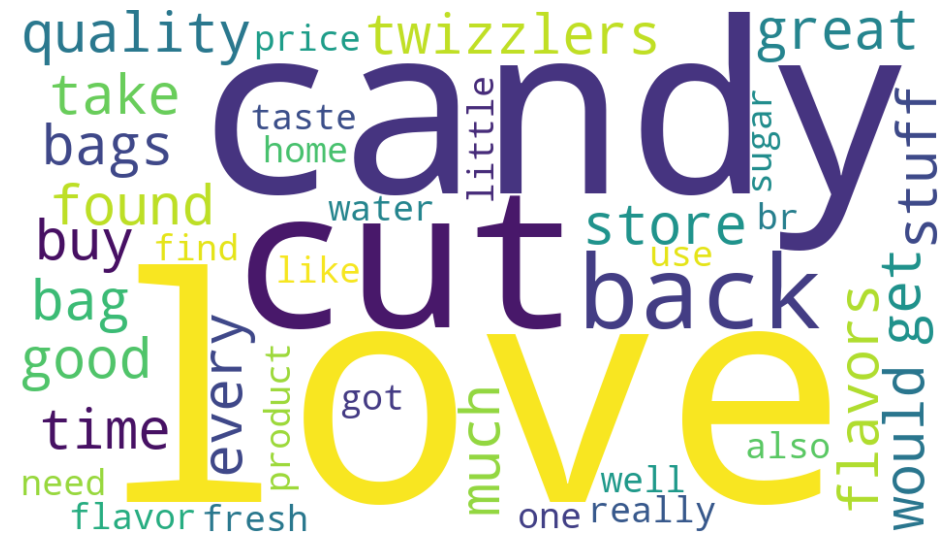

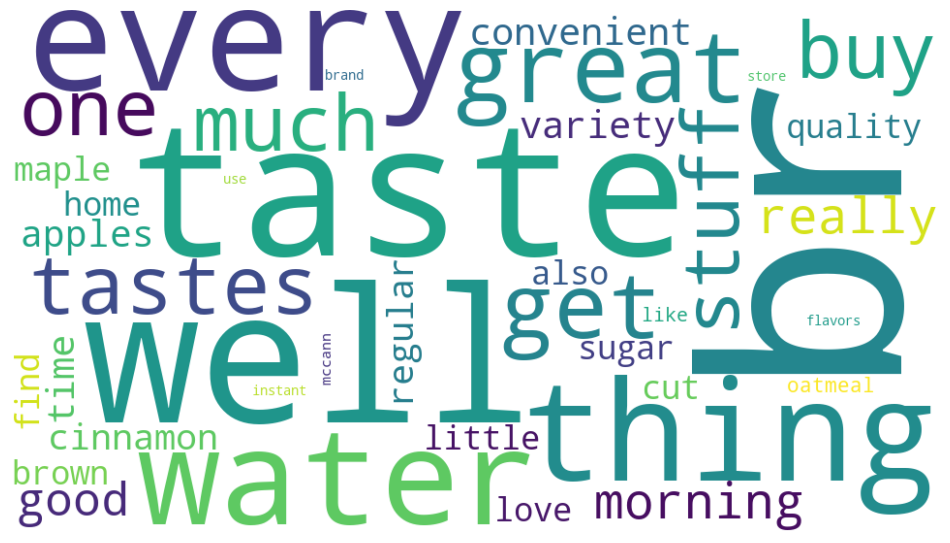

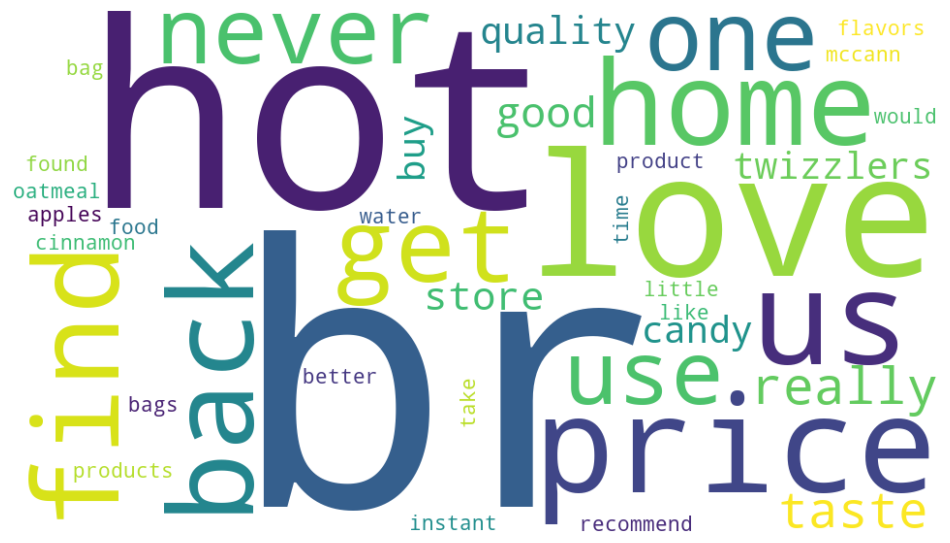

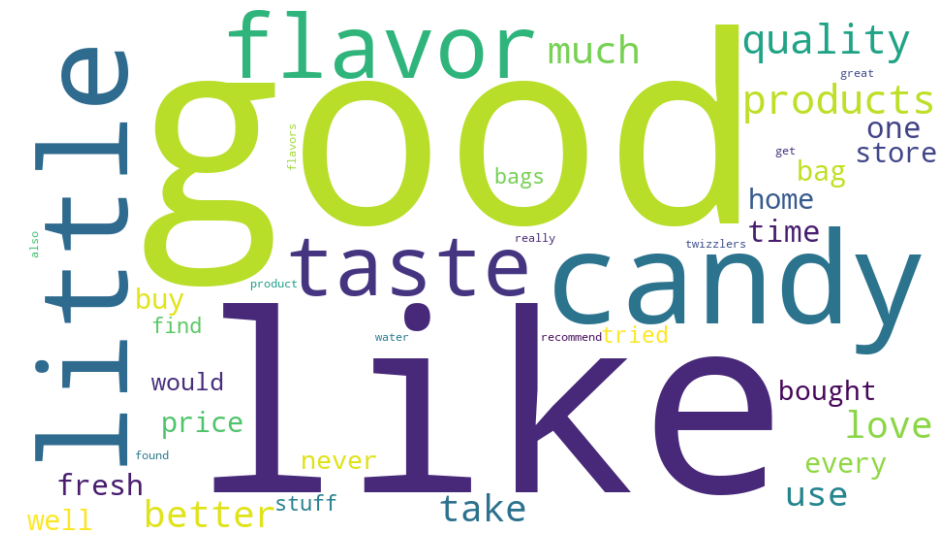

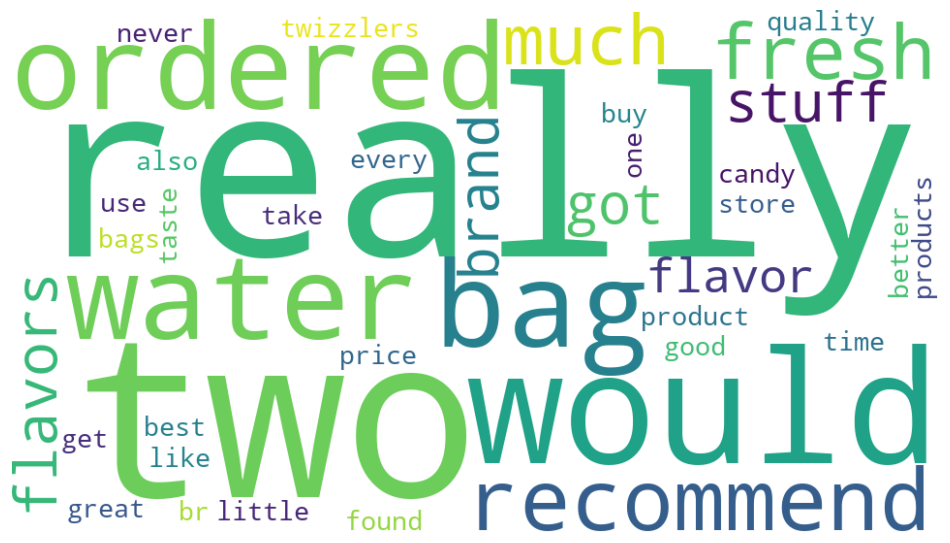

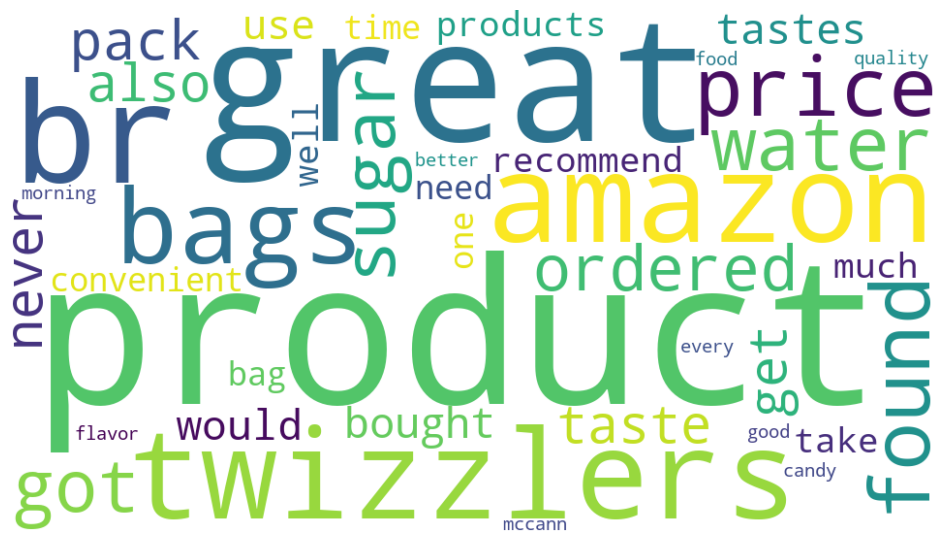

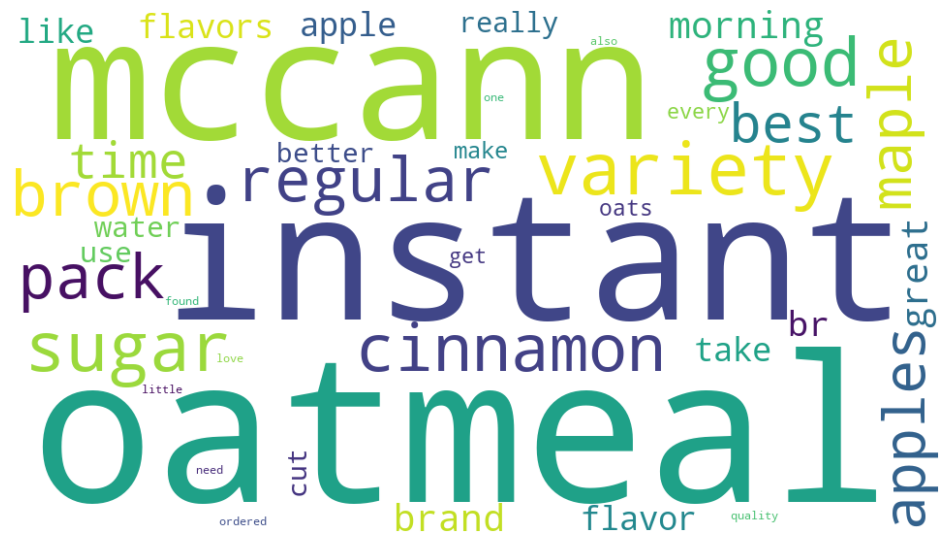

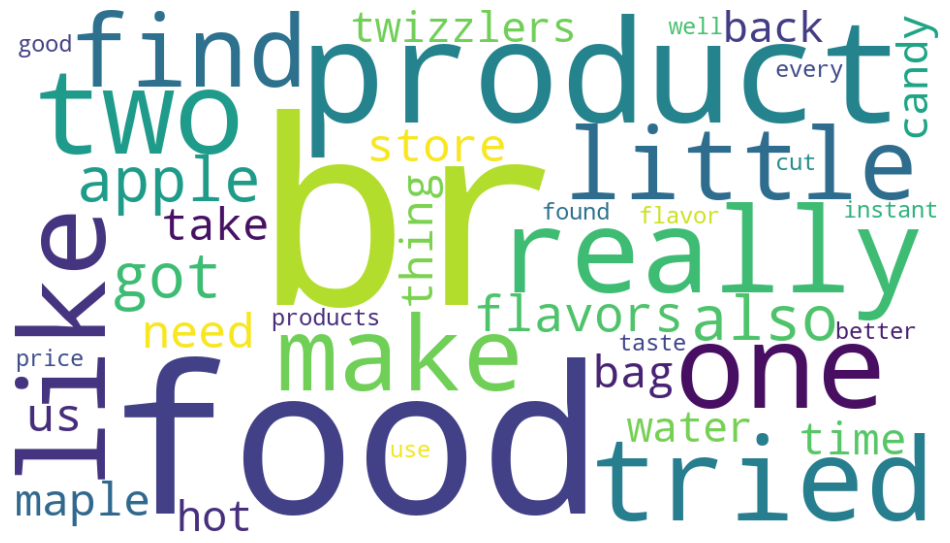

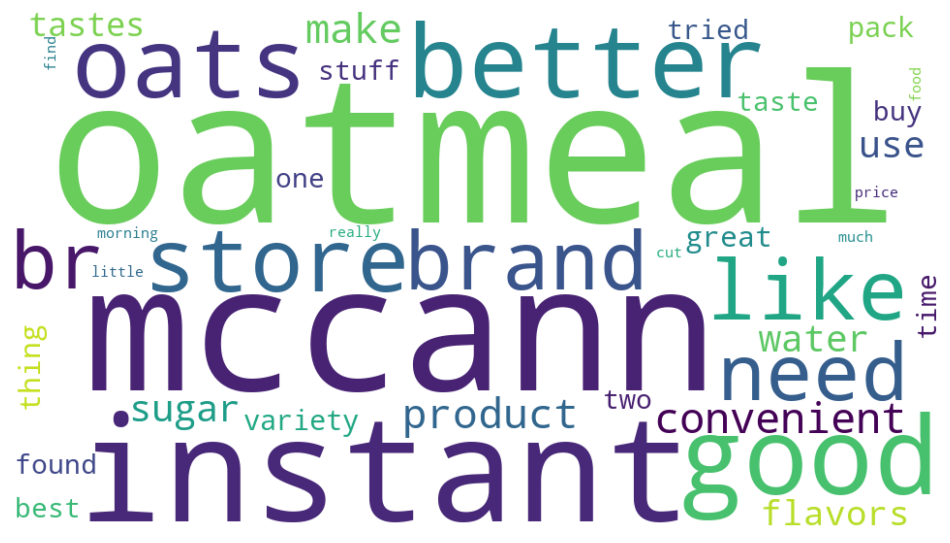

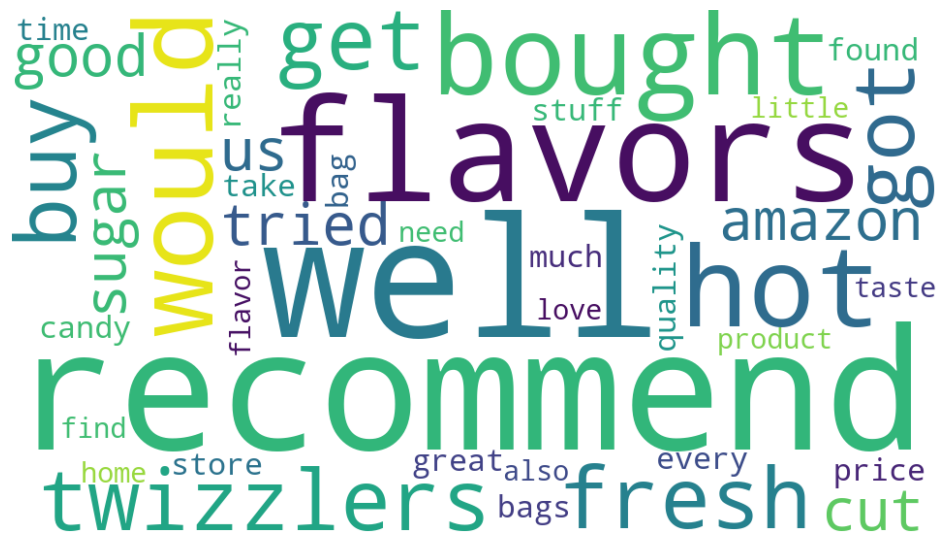

In [30]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

# **The LDA wordclouds**

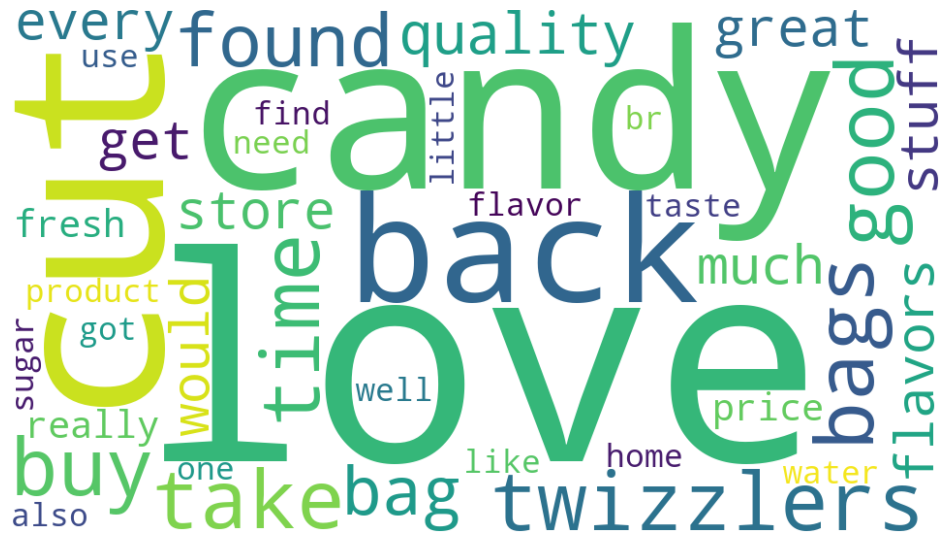

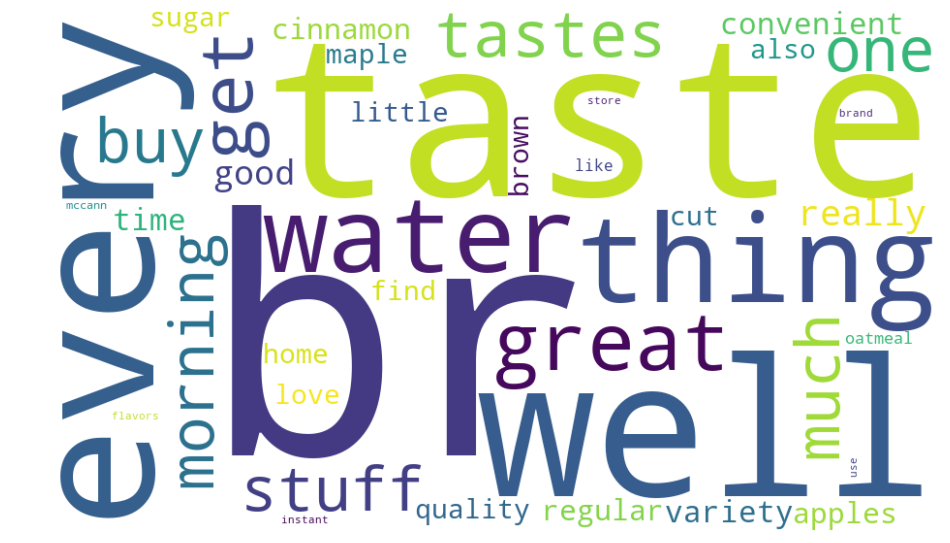

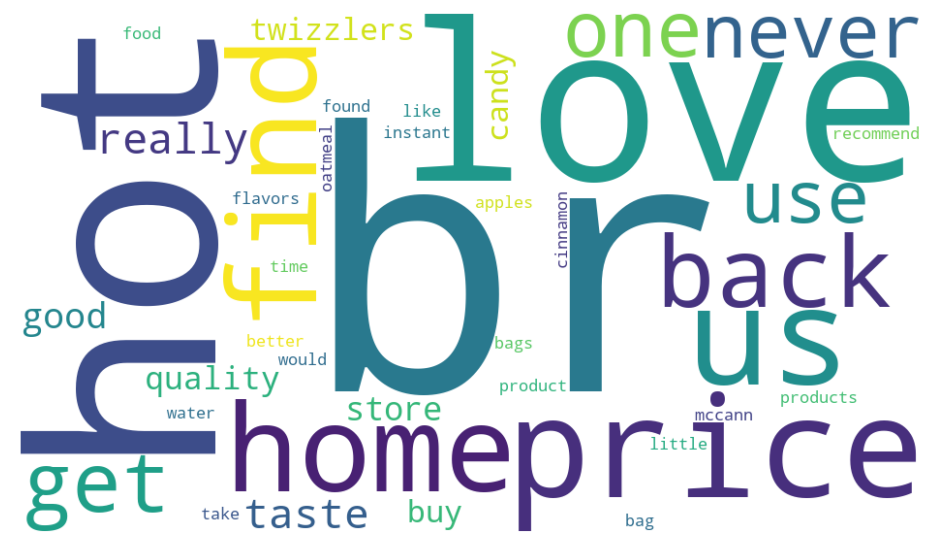

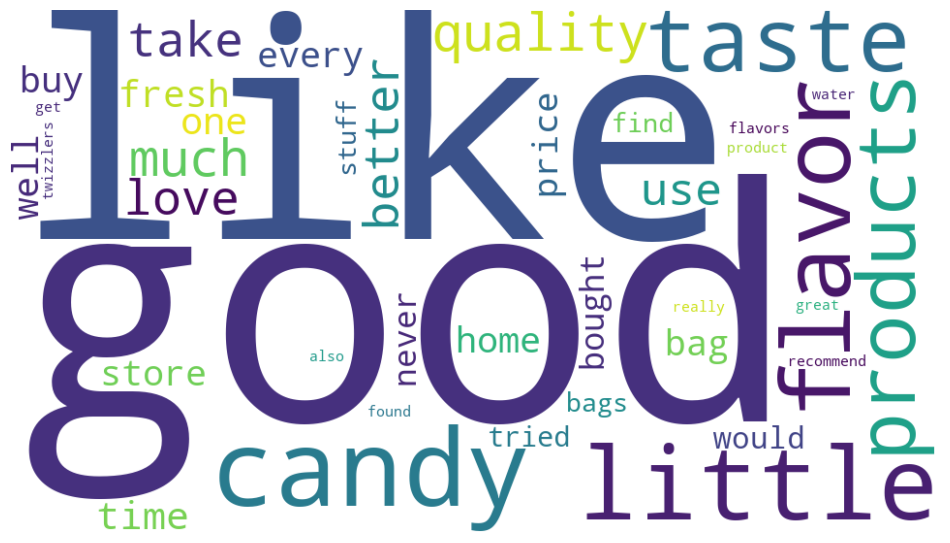

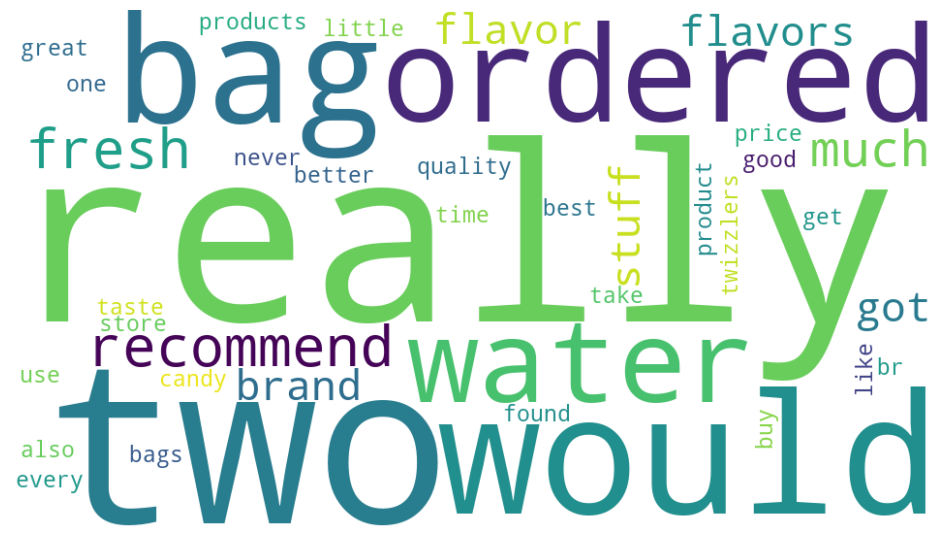

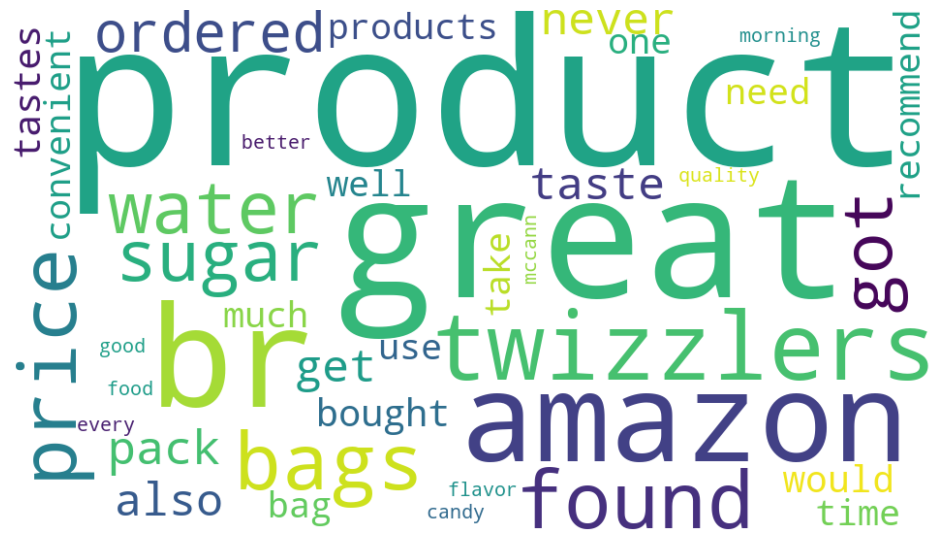

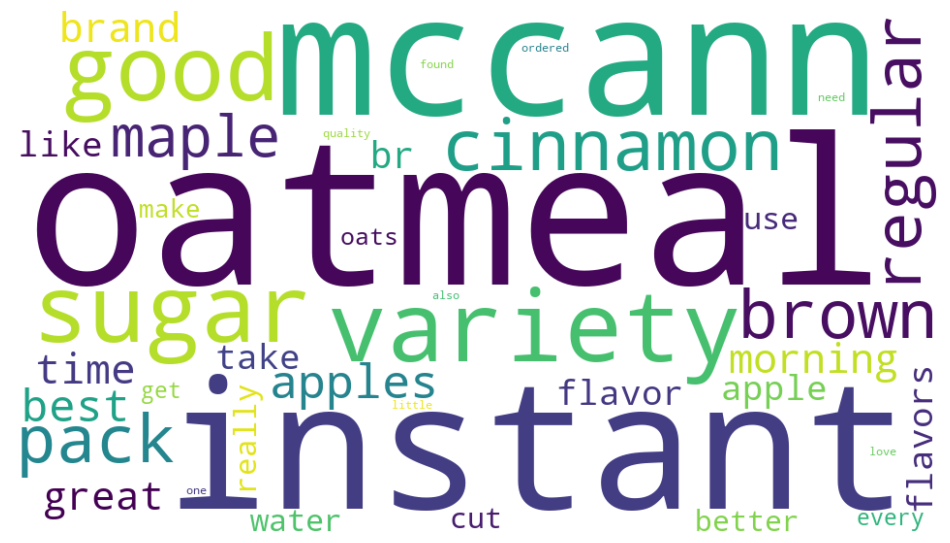

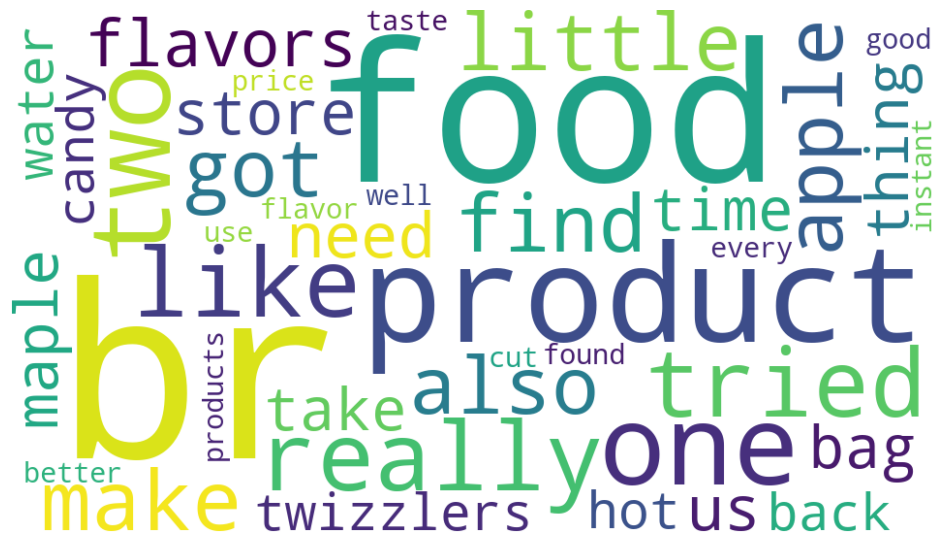

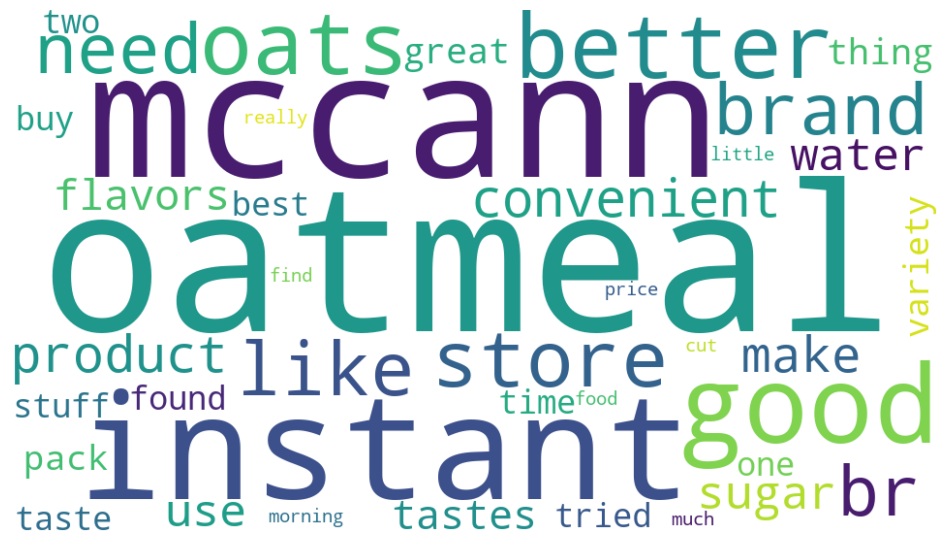

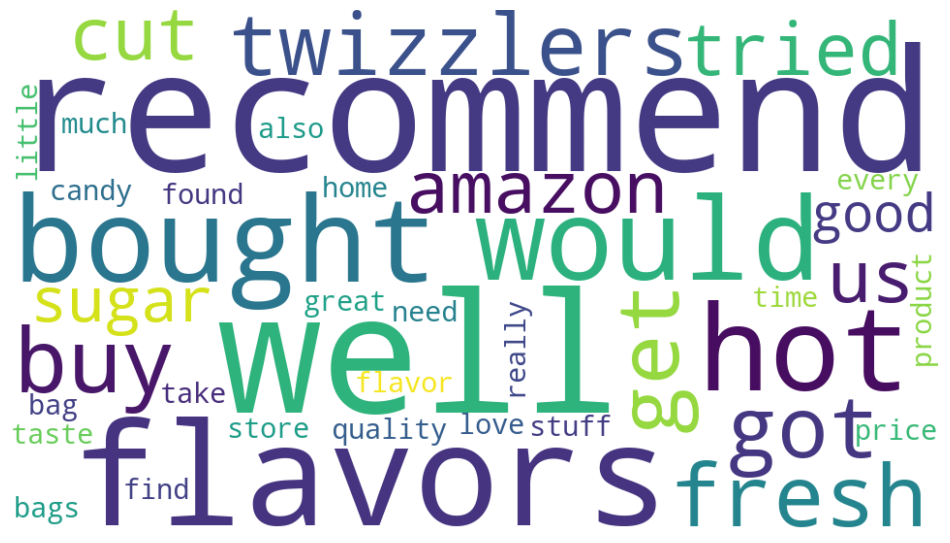

In [31]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())


# **Naming Topics Extracted by NMF from Review Text Data**

In [26]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load your DataFrame
paragraph_df = pd.read_csv("C:\\Users\\keert\\Downloads\\Reviews.csv")

# Drop rows with NaN values in "Text" column
paragraph_df.dropna(subset=['Text'], inplace=True)

# Define the list of stopwords
stopwords_list = stopwords.words('english')

# Initialize TfidfVectorizer
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["Text"])

# Initialize NMF model
nmf_para_model = NMF(n_components=10, random_state=42)

# Fit the NMF model to the vectorized data
W_nmf_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)

# Get the feature names from TfidfVectorizer
voc = tfidf_para_vectorizer.get_feature_names_out()

# Initialize an empty list to store topic names
topic_names = []

# Iterate over the components of NMF model
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

# Print or use topic_names as needed
print(topic_names)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\keert\AppData\Local\Temp\ipykernel_12532\3065953910.py:11: DtypeWarning: Columns (2,3,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  paragraph_df = pd.read_csv("C:\\Users\\keert\\Downloads\\Reviews.csv")


['Topic br hot', 'Topic oatmeal instant', 'Topic candy love', 'Topic product bags', 'Topic great price', 'Topic recommend would', 'Topic flavor buy', 'Topic twizzlers fresh', 'Topic food two', 'Topic good like']


# **Calculating Topic Distribution Percentage by Year**

In [27]:
from tqdm.auto import tqdm
import numpy as np

year_data = []

unique_years = np.unique(paragraph_df["year"])

for year in tqdm(unique_years):
    year_indices = np.array(paragraph_df["year"] == year)
    if np.any(year_indices):  # Check if there are samples available for the current year
        W_year = nmf_para_model.transform(tfidf_para_vectors[year_indices])
        year_data.append([year] + list(W_year.sum(axis=0) / W_year.sum() * 100.0))

  0%|          | 0/21 [00:00<?, ?it/s]

# **Visualizing Topic Distribution Over Years**



<Axes: xlabel='price'>

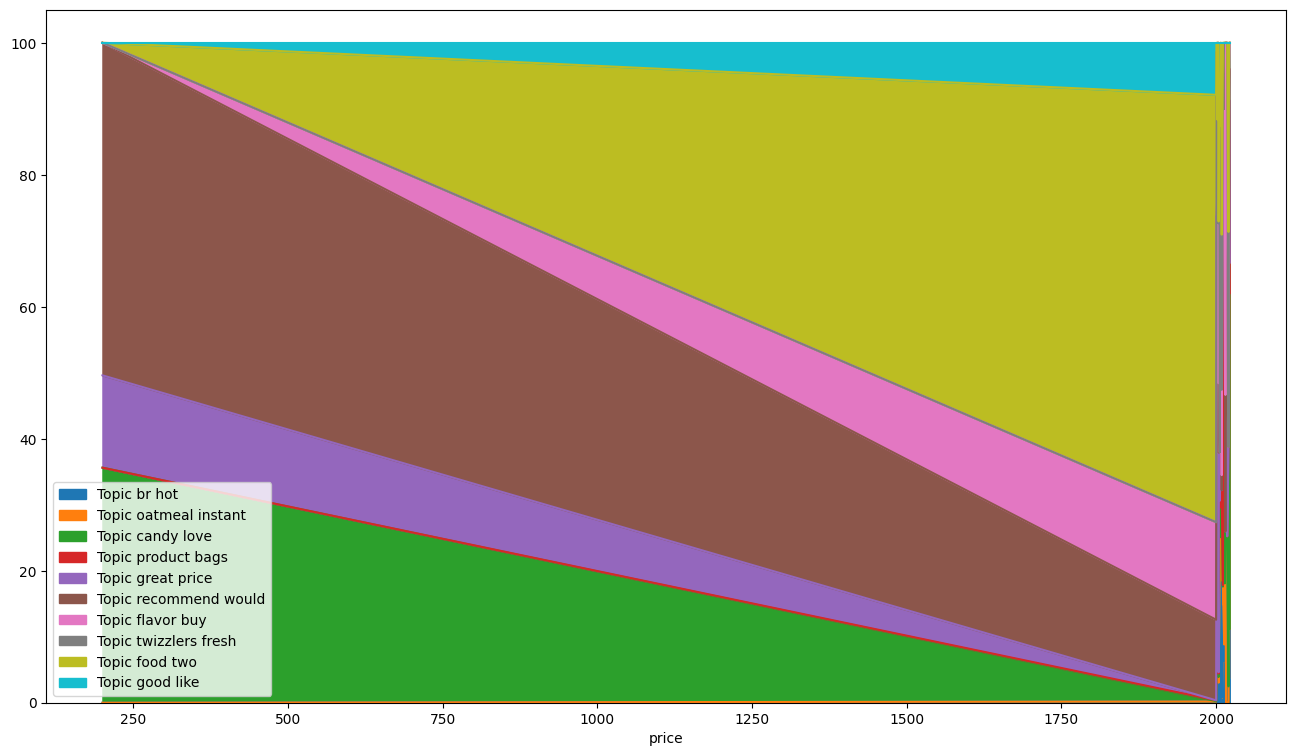

In [28]:
import matplotlib.pyplot as plt
df_year = pd.DataFrame(year_data, columns=["price"] +
topic_names).set_index("price")
df_year.plot.area(figsize=(16,9))